In [1]:
import sys
sys.path.append('../modules')

from model import Resnet, Bottleneck

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
from pathlib import Path 
import numpy as np

In [2]:
# Param

batch_size = 128

In [3]:
train_mean = (0.4914, 0.4822, 0.4465)
train_std = (0.2470, 0.2435, 0.2616)

In [4]:
transform_val = transforms.Compose([transforms.ToTensor(), transforms.Normalize(train_mean, train_std)])

In [5]:
valset = torchvision.datasets.CIFAR10(root='./data/cifar10', train=True, download=False, transform=transform_val)
val_idx = np.load('./cifar10_val_idx.npy')
val_random_sampler = torch.utils.data.SubsetRandomSampler(val_idx)

val_dataloader = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=False,  sampler=val_random_sampler)

#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

model_save_path = './model'
model_list = sorted([x for x in Path(model_save_path).glob('*_epoch_*.pt')], key = lambda x : int(x.stem.strip('model_epoch_')))

In [7]:
loss_history = []
accuracy_history = []

for model in model_list:
    hit = 0
    all_preds = []
    all_labels = []

    net = Resnet(Bottleneck, [3, 4, 6, 3]).to(device)
    net = torch.nn.DataParallel(net, device_ids=[3,4,6,7]).to(device)
    net.load_state_dict(torch.load(model)['state'])

    criterion = nn.CrossEntropyLoss()
    
    net.eval()
    
    with torch.no_grad():
        val_loss = 0
        for (val_x, val_y) in tqdm(val_dataloader):
            preds = net(val_x.to(device))
            loss = criterion(preds, val_y.to(device))
            val_loss += loss
            hit += ((preds.argmax(dim=1) == val_y.to(device)).sum().item())
            
            all_preds.append(preds.argmax(dim=1))
            all_labels.append(val_y)
        
        accuracy = 100 * (hit/len(val_random_sampler))
        loss_history.append(val_loss.item())
        accuracy_history.append(accuracy)
        print(f'accuracy : {accuracy:.4f}')
        print(f'test loss : {val_loss}')
        
        del net

100%|██████████| 79/79 [00:16<00:00,  4.69it/s]


accuracy : 38.7700
test loss : 131.59547424316406


100%|██████████| 79/79 [00:07<00:00, 10.74it/s]


accuracy : 46.7100
test loss : 115.12007904052734


100%|██████████| 79/79 [00:07<00:00, 10.88it/s]


accuracy : 52.5900
test loss : 102.97724914550781


100%|██████████| 79/79 [00:07<00:00, 10.86it/s]


accuracy : 57.0000
test loss : 94.28411102294922


100%|██████████| 79/79 [00:07<00:00, 11.03it/s]


accuracy : 63.6200
test loss : 82.8534927368164


100%|██████████| 79/79 [00:07<00:00, 10.94it/s]


accuracy : 65.8500
test loss : 77.05606842041016


100%|██████████| 79/79 [00:07<00:00, 11.09it/s]


accuracy : 66.6100
test loss : 78.33040618896484


100%|██████████| 79/79 [00:07<00:00, 10.83it/s]


accuracy : 71.5800
test loss : 65.22331237792969


100%|██████████| 79/79 [00:07<00:00, 10.83it/s]


accuracy : 72.2400
test loss : 63.842498779296875


100%|██████████| 79/79 [00:07<00:00, 10.85it/s]


accuracy : 74.1300
test loss : 59.86332702636719


100%|██████████| 79/79 [00:07<00:00, 10.82it/s]


accuracy : 74.7300
test loss : 58.05820083618164


100%|██████████| 79/79 [00:06<00:00, 11.33it/s]


accuracy : 76.2200
test loss : 56.022430419921875


100%|██████████| 79/79 [00:07<00:00, 10.96it/s]


accuracy : 78.2100
test loss : 52.86558151245117


100%|██████████| 79/79 [00:07<00:00, 10.73it/s]


accuracy : 79.3700
test loss : 49.460384368896484


100%|██████████| 79/79 [00:07<00:00, 10.85it/s]


accuracy : 80.6100
test loss : 46.363861083984375


100%|██████████| 79/79 [00:07<00:00, 10.85it/s]


accuracy : 79.1500
test loss : 52.114173889160156


100%|██████████| 79/79 [00:07<00:00, 11.14it/s]


accuracy : 80.9700
test loss : 46.74736404418945


100%|██████████| 79/79 [00:07<00:00, 10.89it/s]


accuracy : 82.5100
test loss : 43.30353927612305


100%|██████████| 79/79 [00:07<00:00, 11.05it/s]


accuracy : 83.0000
test loss : 40.14024353027344


100%|██████████| 79/79 [00:07<00:00, 11.08it/s]


accuracy : 83.1200
test loss : 42.09721755981445


100%|██████████| 79/79 [00:07<00:00, 10.89it/s]


accuracy : 83.5700
test loss : 40.88594436645508


100%|██████████| 79/79 [00:07<00:00, 11.03it/s]


accuracy : 83.7200
test loss : 42.1151237487793


100%|██████████| 79/79 [00:07<00:00, 11.04it/s]


accuracy : 82.3200
test loss : 44.97604751586914


100%|██████████| 79/79 [00:07<00:00, 11.13it/s]


accuracy : 84.7200
test loss : 39.90996551513672


100%|██████████| 79/79 [00:07<00:00, 10.98it/s]


accuracy : 83.3700
test loss : 41.93956756591797


100%|██████████| 79/79 [00:07<00:00, 11.21it/s]


accuracy : 84.3800
test loss : 39.853607177734375


100%|██████████| 79/79 [00:07<00:00, 10.93it/s]


accuracy : 84.3600
test loss : 40.6339111328125


100%|██████████| 79/79 [00:07<00:00, 10.95it/s]


accuracy : 84.7800
test loss : 39.73069763183594


100%|██████████| 79/79 [00:07<00:00, 10.99it/s]


accuracy : 85.4900
test loss : 38.56497573852539


100%|██████████| 79/79 [00:07<00:00, 11.12it/s]


accuracy : 84.4300
test loss : 42.21583938598633


100%|██████████| 79/79 [00:07<00:00, 11.16it/s]


accuracy : 85.1000
test loss : 41.70689010620117


100%|██████████| 79/79 [00:07<00:00, 11.26it/s]


accuracy : 85.0200
test loss : 41.14160919189453


100%|██████████| 79/79 [00:06<00:00, 11.55it/s]


accuracy : 85.0400
test loss : 42.45399475097656


100%|██████████| 79/79 [00:07<00:00, 11.22it/s]


accuracy : 85.8100
test loss : 40.580345153808594


100%|██████████| 79/79 [00:07<00:00, 11.23it/s]


accuracy : 85.6400
test loss : 40.22692108154297


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 84.8300
test loss : 44.494991302490234


100%|██████████| 79/79 [00:06<00:00, 11.48it/s]


accuracy : 85.6500
test loss : 42.71946716308594


100%|██████████| 79/79 [00:06<00:00, 11.37it/s]


accuracy : 85.7600
test loss : 40.63574981689453


100%|██████████| 79/79 [00:07<00:00, 11.25it/s]


accuracy : 86.5600
test loss : 41.143798828125


100%|██████████| 79/79 [00:07<00:00, 11.10it/s]


accuracy : 86.3400
test loss : 40.485389709472656


100%|██████████| 79/79 [00:06<00:00, 11.29it/s]


accuracy : 85.7800
test loss : 43.72046661376953


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 87.5400
test loss : 38.07313537597656


100%|██████████| 79/79 [00:07<00:00, 11.27it/s]


accuracy : 86.0800
test loss : 42.1552619934082


100%|██████████| 79/79 [00:06<00:00, 11.30it/s]


accuracy : 86.6000
test loss : 42.52174377441406


100%|██████████| 79/79 [00:07<00:00, 11.21it/s]


accuracy : 85.9800
test loss : 44.07199478149414


100%|██████████| 79/79 [00:06<00:00, 11.48it/s]


accuracy : 86.5400
test loss : 45.00992965698242


100%|██████████| 79/79 [00:06<00:00, 11.37it/s]


accuracy : 85.9500
test loss : 45.963104248046875


100%|██████████| 79/79 [00:06<00:00, 11.35it/s]


accuracy : 87.2500
test loss : 42.047996520996094


100%|██████████| 79/79 [00:07<00:00, 11.21it/s]


accuracy : 87.2800
test loss : 41.25783920288086


100%|██████████| 79/79 [00:06<00:00, 11.41it/s]


accuracy : 86.8200
test loss : 42.83567428588867


100%|██████████| 79/79 [00:07<00:00, 11.25it/s]


accuracy : 87.3100
test loss : 43.166526794433594


100%|██████████| 79/79 [00:07<00:00, 11.26it/s]


accuracy : 86.2700
test loss : 47.38364028930664


100%|██████████| 79/79 [00:07<00:00, 11.25it/s]


accuracy : 86.4100
test loss : 47.39750671386719


100%|██████████| 79/79 [00:06<00:00, 11.31it/s]


accuracy : 86.7000
test loss : 46.65705871582031


100%|██████████| 79/79 [00:06<00:00, 11.39it/s]


accuracy : 86.3300
test loss : 47.68974304199219


100%|██████████| 79/79 [00:07<00:00, 11.24it/s]


accuracy : 86.9500
test loss : 46.99140548706055


100%|██████████| 79/79 [00:06<00:00, 11.41it/s]


accuracy : 86.8000
test loss : 48.808563232421875


100%|██████████| 79/79 [00:06<00:00, 11.40it/s]


accuracy : 87.0600
test loss : 46.421661376953125


100%|██████████| 79/79 [00:07<00:00, 11.19it/s]


accuracy : 87.2800
test loss : 46.507118225097656


100%|██████████| 79/79 [00:06<00:00, 11.51it/s]


accuracy : 87.2000
test loss : 47.03302001953125


100%|██████████| 79/79 [00:06<00:00, 11.45it/s]


accuracy : 87.3100
test loss : 49.24832534790039


100%|██████████| 79/79 [00:06<00:00, 11.43it/s]


accuracy : 87.8100
test loss : 43.38030242919922


100%|██████████| 79/79 [00:07<00:00, 11.22it/s]


accuracy : 88.0400
test loss : 45.48969268798828


100%|██████████| 79/79 [00:06<00:00, 11.41it/s]


accuracy : 87.5500
test loss : 44.85454177856445


100%|██████████| 79/79 [00:06<00:00, 11.39it/s]


accuracy : 87.6300
test loss : 46.08371353149414


100%|██████████| 79/79 [00:06<00:00, 11.48it/s]


accuracy : 87.9800
test loss : 46.057044982910156


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 88.3800
test loss : 43.08979034423828


100%|██████████| 79/79 [00:06<00:00, 11.30it/s]


accuracy : 87.8600
test loss : 47.642127990722656


100%|██████████| 79/79 [00:06<00:00, 11.34it/s]


accuracy : 88.2500
test loss : 46.270965576171875


100%|██████████| 79/79 [00:06<00:00, 11.48it/s]


accuracy : 88.3500
test loss : 45.96726989746094


100%|██████████| 79/79 [00:07<00:00, 11.25it/s]


accuracy : 87.1500
test loss : 50.24675369262695


100%|██████████| 79/79 [00:06<00:00, 11.48it/s]


accuracy : 88.7000
test loss : 42.8161506652832


100%|██████████| 79/79 [00:06<00:00, 11.42it/s]


accuracy : 87.8500
test loss : 47.01740646362305


100%|██████████| 79/79 [00:06<00:00, 11.33it/s]


accuracy : 87.7500
test loss : 46.994911193847656


100%|██████████| 79/79 [00:06<00:00, 11.34it/s]


accuracy : 87.2700
test loss : 52.06838607788086


100%|██████████| 79/79 [00:06<00:00, 11.30it/s]


accuracy : 87.9400
test loss : 47.833736419677734


100%|██████████| 79/79 [00:07<00:00, 11.17it/s]


accuracy : 87.8600
test loss : 46.276153564453125


100%|██████████| 79/79 [00:06<00:00, 11.40it/s]


accuracy : 87.4900
test loss : 51.76582336425781


100%|██████████| 79/79 [00:06<00:00, 11.38it/s]


accuracy : 87.0500
test loss : 51.63666915893555


100%|██████████| 79/79 [00:06<00:00, 11.35it/s]


accuracy : 88.3200
test loss : 47.35877990722656


100%|██████████| 79/79 [00:07<00:00, 11.04it/s]


accuracy : 88.0300
test loss : 47.58896255493164


100%|██████████| 79/79 [00:06<00:00, 11.40it/s]


accuracy : 88.5000
test loss : 47.87748718261719


100%|██████████| 79/79 [00:06<00:00, 11.29it/s]


accuracy : 88.7500
test loss : 46.96061325073242


100%|██████████| 79/79 [00:06<00:00, 11.40it/s]


accuracy : 88.3800
test loss : 48.04417037963867


100%|██████████| 79/79 [00:06<00:00, 11.44it/s]


accuracy : 88.3400
test loss : 48.5045280456543


100%|██████████| 79/79 [00:07<00:00, 11.16it/s]


accuracy : 88.5600
test loss : 47.659423828125


100%|██████████| 79/79 [00:07<00:00, 11.21it/s]


accuracy : 88.3300
test loss : 47.8078498840332


100%|██████████| 79/79 [00:06<00:00, 11.49it/s]


accuracy : 88.2900
test loss : 49.207191467285156


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 88.3800
test loss : 47.99889373779297


100%|██████████| 79/79 [00:06<00:00, 11.54it/s]


accuracy : 88.4700
test loss : 49.20924758911133


100%|██████████| 79/79 [00:06<00:00, 11.63it/s]


accuracy : 88.4800
test loss : 49.97468566894531


100%|██████████| 79/79 [00:06<00:00, 11.50it/s]


accuracy : 88.3600
test loss : 50.528709411621094


100%|██████████| 79/79 [00:06<00:00, 11.29it/s]


accuracy : 88.9100
test loss : 46.92262649536133


100%|██████████| 79/79 [00:06<00:00, 11.33it/s]


accuracy : 88.6100
test loss : 49.10166931152344


100%|██████████| 79/79 [00:06<00:00, 11.29it/s]


accuracy : 88.5100
test loss : 51.151893615722656


100%|██████████| 79/79 [00:06<00:00, 11.36it/s]


accuracy : 88.5100
test loss : 49.44356155395508


100%|██████████| 79/79 [00:06<00:00, 11.43it/s]


accuracy : 88.6100
test loss : 50.36629867553711


100%|██████████| 79/79 [00:06<00:00, 11.34it/s]


accuracy : 88.4400
test loss : 51.25019836425781


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 88.4600
test loss : 52.58081817626953


100%|██████████| 79/79 [00:06<00:00, 11.46it/s]


accuracy : 88.9900
test loss : 49.16108322143555


100%|██████████| 79/79 [00:06<00:00, 11.34it/s]


accuracy : 88.7400
test loss : 50.85698699951172


100%|██████████| 79/79 [00:06<00:00, 11.42it/s]


accuracy : 88.8900
test loss : 49.24483871459961


100%|██████████| 79/79 [00:06<00:00, 11.45it/s]


accuracy : 88.5700
test loss : 52.63959884643555


100%|██████████| 79/79 [00:06<00:00, 11.44it/s]


accuracy : 88.8500
test loss : 49.021976470947266


100%|██████████| 79/79 [00:07<00:00, 11.27it/s]


accuracy : 88.8000
test loss : 50.58470153808594


100%|██████████| 79/79 [00:07<00:00, 11.14it/s]


accuracy : 88.6500
test loss : 52.19365310668945


100%|██████████| 79/79 [00:06<00:00, 11.38it/s]


accuracy : 88.7400
test loss : 50.40701675415039


100%|██████████| 79/79 [00:07<00:00, 11.28it/s]


accuracy : 89.0100
test loss : 50.7133903503418


100%|██████████| 79/79 [00:06<00:00, 11.41it/s]


accuracy : 89.3300
test loss : 49.00559997558594


100%|██████████| 79/79 [00:06<00:00, 11.42it/s]


accuracy : 88.8700
test loss : 49.86728286743164


100%|██████████| 79/79 [00:06<00:00, 11.35it/s]


accuracy : 88.3700
test loss : 51.32129669189453


100%|██████████| 79/79 [00:06<00:00, 11.37it/s]


accuracy : 88.8400
test loss : 49.84019470214844


100%|██████████| 79/79 [00:06<00:00, 11.29it/s]


accuracy : 88.9300
test loss : 49.49138259887695


100%|██████████| 79/79 [00:06<00:00, 11.35it/s]


accuracy : 89.1000
test loss : 46.741024017333984


100%|██████████| 79/79 [00:06<00:00, 11.38it/s]


accuracy : 88.7300
test loss : 49.12055206298828


100%|██████████| 79/79 [00:06<00:00, 11.36it/s]


accuracy : 89.0500
test loss : 49.930484771728516


100%|██████████| 79/79 [00:06<00:00, 11.38it/s]


accuracy : 89.3300
test loss : 48.105159759521484


100%|██████████| 79/79 [00:06<00:00, 11.36it/s]


accuracy : 88.9800
test loss : 50.32789611816406


100%|██████████| 79/79 [00:06<00:00, 11.53it/s]


accuracy : 89.2100
test loss : 47.35895919799805


100%|██████████| 79/79 [00:06<00:00, 11.45it/s]


accuracy : 89.4300
test loss : 47.336734771728516


100%|██████████| 79/79 [00:07<00:00, 11.27it/s]


accuracy : 89.0900
test loss : 51.33818817138672


100%|██████████| 79/79 [00:06<00:00, 11.39it/s]


accuracy : 89.3800
test loss : 48.56295394897461


100%|██████████| 79/79 [00:06<00:00, 11.43it/s]


accuracy : 89.0300
test loss : 51.093597412109375


100%|██████████| 79/79 [00:06<00:00, 11.32it/s]


accuracy : 89.2600
test loss : 51.798927307128906


100%|██████████| 79/79 [00:06<00:00, 11.42it/s]


accuracy : 89.1900
test loss : 51.999385833740234


100%|██████████| 79/79 [00:06<00:00, 11.46it/s]


accuracy : 89.3700
test loss : 50.134803771972656


100%|██████████| 79/79 [00:06<00:00, 11.44it/s]


accuracy : 88.9700
test loss : 52.14134979248047


100%|██████████| 79/79 [00:07<00:00, 11.25it/s]


accuracy : 89.6500
test loss : 49.81385040283203


100%|██████████| 79/79 [00:06<00:00, 11.53it/s]


accuracy : 88.9200
test loss : 52.62385559082031


100%|██████████| 79/79 [00:06<00:00, 11.43it/s]


accuracy : 89.4400
test loss : 49.62358093261719


100%|██████████| 79/79 [00:06<00:00, 11.38it/s]


accuracy : 89.0000
test loss : 51.966224670410156


100%|██████████| 79/79 [00:06<00:00, 11.37it/s]


accuracy : 89.2600
test loss : 50.1790885925293


100%|██████████| 79/79 [00:06<00:00, 11.38it/s]


accuracy : 89.2600
test loss : 49.84585952758789


100%|██████████| 79/79 [00:06<00:00, 11.53it/s]


accuracy : 89.2500
test loss : 51.69279098510742


100%|██████████| 79/79 [00:07<00:00, 11.27it/s]


accuracy : 89.0000
test loss : 51.975528717041016


100%|██████████| 79/79 [00:07<00:00, 11.25it/s]


accuracy : 89.1500
test loss : 52.21076965332031


100%|██████████| 79/79 [00:06<00:00, 11.44it/s]


accuracy : 89.3000
test loss : 52.77678680419922


100%|██████████| 79/79 [00:06<00:00, 11.49it/s]


accuracy : 89.0600
test loss : 51.6674690246582


100%|██████████| 79/79 [00:06<00:00, 11.46it/s]


accuracy : 89.0200
test loss : 51.264137268066406


100%|██████████| 79/79 [00:06<00:00, 11.35it/s]


accuracy : 88.9200
test loss : 52.927730560302734


100%|██████████| 79/79 [00:06<00:00, 11.32it/s]


accuracy : 89.0900
test loss : 53.43455123901367


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 89.6800
test loss : 51.076236724853516


100%|██████████| 79/79 [00:06<00:00, 11.41it/s]


accuracy : 89.4400
test loss : 52.06118392944336


100%|██████████| 79/79 [00:06<00:00, 11.45it/s]


accuracy : 88.4800
test loss : 56.57413864135742


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 89.3000
test loss : 51.33845901489258


100%|██████████| 79/79 [00:06<00:00, 11.46it/s]


accuracy : 89.7400
test loss : 48.15882873535156


100%|██████████| 79/79 [00:06<00:00, 11.46it/s]


accuracy : 89.2900
test loss : 50.371299743652344


100%|██████████| 79/79 [00:06<00:00, 11.45it/s]


accuracy : 89.1100
test loss : 54.66845703125


100%|██████████| 79/79 [00:06<00:00, 11.42it/s]


accuracy : 89.4200
test loss : 50.42350769042969


100%|██████████| 79/79 [00:06<00:00, 11.44it/s]


accuracy : 88.9700
test loss : 54.49022674560547


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 89.2000
test loss : 53.31840896606445


100%|██████████| 79/79 [00:07<00:00, 11.27it/s]


accuracy : 89.3600
test loss : 53.859283447265625


100%|██████████| 79/79 [00:06<00:00, 11.44it/s]


accuracy : 89.2900
test loss : 52.88602066040039


100%|██████████| 79/79 [00:06<00:00, 11.51it/s]


accuracy : 89.7200
test loss : 51.95200729370117


100%|██████████| 79/79 [00:06<00:00, 11.34it/s]


accuracy : 89.4700
test loss : 52.01995849609375


100%|██████████| 79/79 [00:06<00:00, 11.37it/s]


accuracy : 89.4900
test loss : 51.20674133300781


100%|██████████| 79/79 [00:06<00:00, 11.46it/s]


accuracy : 88.9500
test loss : 57.02286148071289


100%|██████████| 79/79 [00:06<00:00, 11.40it/s]


accuracy : 89.6100
test loss : 52.280548095703125


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 88.6800
test loss : 54.34999084472656


100%|██████████| 79/79 [00:06<00:00, 11.42it/s]


accuracy : 89.2900
test loss : 51.779701232910156


100%|██████████| 79/79 [00:07<00:00, 11.26it/s]


accuracy : 89.0200
test loss : 54.93972396850586


100%|██████████| 79/79 [00:06<00:00, 11.32it/s]


accuracy : 89.7800
test loss : 50.04005432128906


100%|██████████| 79/79 [00:06<00:00, 11.38it/s]


accuracy : 89.6600
test loss : 52.36037063598633


100%|██████████| 79/79 [00:07<00:00, 11.28it/s]


accuracy : 89.4900
test loss : 49.55265426635742


100%|██████████| 79/79 [00:06<00:00, 11.38it/s]


accuracy : 89.6400
test loss : 51.30548095703125


100%|██████████| 79/79 [00:06<00:00, 11.42it/s]


accuracy : 89.0900
test loss : 54.98897933959961


100%|██████████| 79/79 [00:07<00:00, 11.22it/s]


accuracy : 89.0900
test loss : 53.14791488647461


100%|██████████| 79/79 [00:06<00:00, 11.29it/s]


accuracy : 89.4100
test loss : 51.973052978515625


100%|██████████| 79/79 [00:06<00:00, 11.37it/s]


accuracy : 89.1400
test loss : 54.35113525390625


100%|██████████| 79/79 [00:06<00:00, 11.40it/s]


accuracy : 89.2300
test loss : 53.20525360107422


100%|██████████| 79/79 [00:06<00:00, 11.37it/s]


accuracy : 88.8400
test loss : 58.190792083740234


100%|██████████| 79/79 [00:07<00:00, 11.25it/s]


accuracy : 89.5500
test loss : 53.92102813720703


100%|██████████| 79/79 [00:06<00:00, 11.33it/s]


accuracy : 89.6800
test loss : 51.12797164916992


100%|██████████| 79/79 [00:06<00:00, 11.42it/s]


accuracy : 89.5200
test loss : 51.933380126953125


100%|██████████| 79/79 [00:06<00:00, 11.43it/s]


accuracy : 89.8400
test loss : 50.0328254699707


100%|██████████| 79/79 [00:06<00:00, 11.36it/s]


accuracy : 89.2400
test loss : 52.389183044433594


100%|██████████| 79/79 [00:07<00:00, 11.01it/s]


accuracy : 89.1400
test loss : 53.151485443115234


100%|██████████| 79/79 [00:06<00:00, 11.33it/s]


accuracy : 89.5800
test loss : 52.41743850708008


100%|██████████| 79/79 [00:06<00:00, 11.49it/s]


accuracy : 89.7900
test loss : 50.55902099609375


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 89.5300
test loss : 51.8252067565918


100%|██████████| 79/79 [00:06<00:00, 11.38it/s]


accuracy : 89.3100
test loss : 53.04214096069336


100%|██████████| 79/79 [00:07<00:00, 11.24it/s]


accuracy : 89.7100
test loss : 52.787784576416016


100%|██████████| 79/79 [00:07<00:00, 11.06it/s]


accuracy : 89.5600
test loss : 52.586456298828125


100%|██████████| 79/79 [00:06<00:00, 11.36it/s]


accuracy : 89.6900
test loss : 51.66075897216797


100%|██████████| 79/79 [00:06<00:00, 11.34it/s]


accuracy : 89.6800
test loss : 52.562347412109375


100%|██████████| 79/79 [00:06<00:00, 11.47it/s]


accuracy : 89.4700
test loss : 52.26347351074219


100%|██████████| 79/79 [00:06<00:00, 11.44it/s]


accuracy : 89.5800
test loss : 54.704227447509766


100%|██████████| 79/79 [00:06<00:00, 11.37it/s]


accuracy : 89.9100
test loss : 53.36309814453125


100%|██████████| 79/79 [00:07<00:00, 11.25it/s]


accuracy : 89.6800
test loss : 54.30506896972656


100%|██████████| 79/79 [00:07<00:00, 11.25it/s]


accuracy : 89.8200
test loss : 54.10676956176758


100%|██████████| 79/79 [00:07<00:00, 11.28it/s]


accuracy : 90.2400
test loss : 51.765380859375


100%|██████████| 79/79 [00:06<00:00, 11.40it/s]


accuracy : 89.2400
test loss : 54.5004768371582


100%|██████████| 79/79 [00:07<00:00, 11.23it/s]


accuracy : 89.6500
test loss : 51.995887756347656


100%|██████████| 79/79 [00:06<00:00, 11.30it/s]


accuracy : 89.7000
test loss : 51.57889938354492


100%|██████████| 79/79 [00:06<00:00, 11.29it/s]


accuracy : 89.8900
test loss : 53.11842346191406


100%|██████████| 79/79 [00:06<00:00, 11.46it/s]


accuracy : 89.3400
test loss : 52.82655334472656


100%|██████████| 79/79 [00:06<00:00, 11.34it/s]


accuracy : 89.6500
test loss : 53.05829620361328


100%|██████████| 79/79 [00:06<00:00, 11.41it/s]


accuracy : 89.3500
test loss : 54.40187454223633


100%|██████████| 79/79 [00:06<00:00, 11.36it/s]


accuracy : 89.5700
test loss : 53.419715881347656


100%|██████████| 79/79 [00:07<00:00, 11.23it/s]

accuracy : 89.6500
test loss : 53.23290252685547


In [8]:
from matplotlib import pyplot as plt

In [17]:
train_loss = torch.load(model_list[-1])['loss_history']
avg_train_loss = []

for i in range(len(model_list)):
    avg_train_loss.append(train_loss[i]/(len(valset) - len(val_idx)))

In [18]:
avg_val_loss = []

for i in range(len(model_list)):
    avg_val_loss.append(loss_history[i]/ len(val_idx))

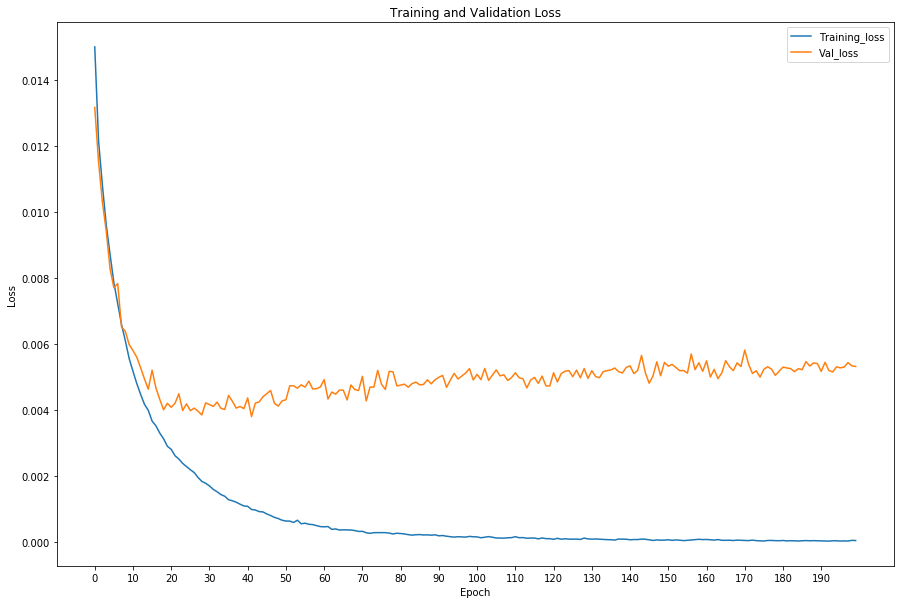

In [19]:
plt.figure(figsize = (15,10))

plt.plot([i for i in range(200)],avg_train_loss)
plt.plot([i for i in range(200)],avg_val_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([i for i in range(0,200,10)])
plt.title('Training and Validation Loss')
plt.legend(['Training_loss','Val_loss'])

In [20]:
import numpy as np 
np.save('./val_loss_history',loss_history)

In [22]:
np.save('./val_acc_history', accuracy_history)

In [26]:
best_model_acc = 0

for i in range(len(accuracy_history)):
    if accuracy_history[i] > best_model_acc:
        best_model_acc = accuracy_history[i]
        best_model_idx = i

In [27]:
best_model_idx

190

In [30]:
accuracy_history[190]

90.24